# Titanik Hayatta Kalanlar

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore') 

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df1=pd.read_csv('ttrain.csv')

In [123]:
df2=pd.read_csv('ttest.csv')

## EDA - Exploratory Data Analysis - Keşfedici Veri Analizi

In [6]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df=pd.concat([df1,df2])

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
220,1112,NaN,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C
332,333,0.0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
147,1039,NaN,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S
136,1028,NaN,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
233,234,1.0,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S


In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
df.shape

(1309, 12)

In [14]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


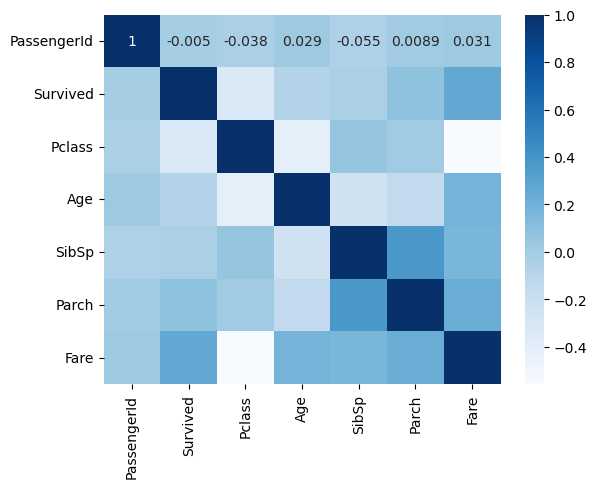

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [16]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
df['Age'].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

### <font color=cyan> Burada Title adınya yeni bir sütün oluşturduk ve farklı dillerde kişileri çağırma kelimesini bir kaç gruba çevirdik

In [20]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [21]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [22]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Don','Sir','Capt','Jonkheer'],'Mr')

In [23]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

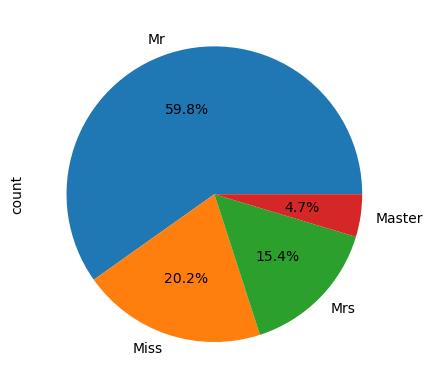

In [24]:
df['Title'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0,0,0]);

### <font color=CC3333> Burada Age adındaki sütünda içi boş verileri doldurduk

In [26]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [27]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Title             0
dtype: int64

In [28]:
dfa=df

In [29]:
dfa['Agea']=df['Age'].astype(int)

In [30]:
dfa=df[df['Agea']<=40]

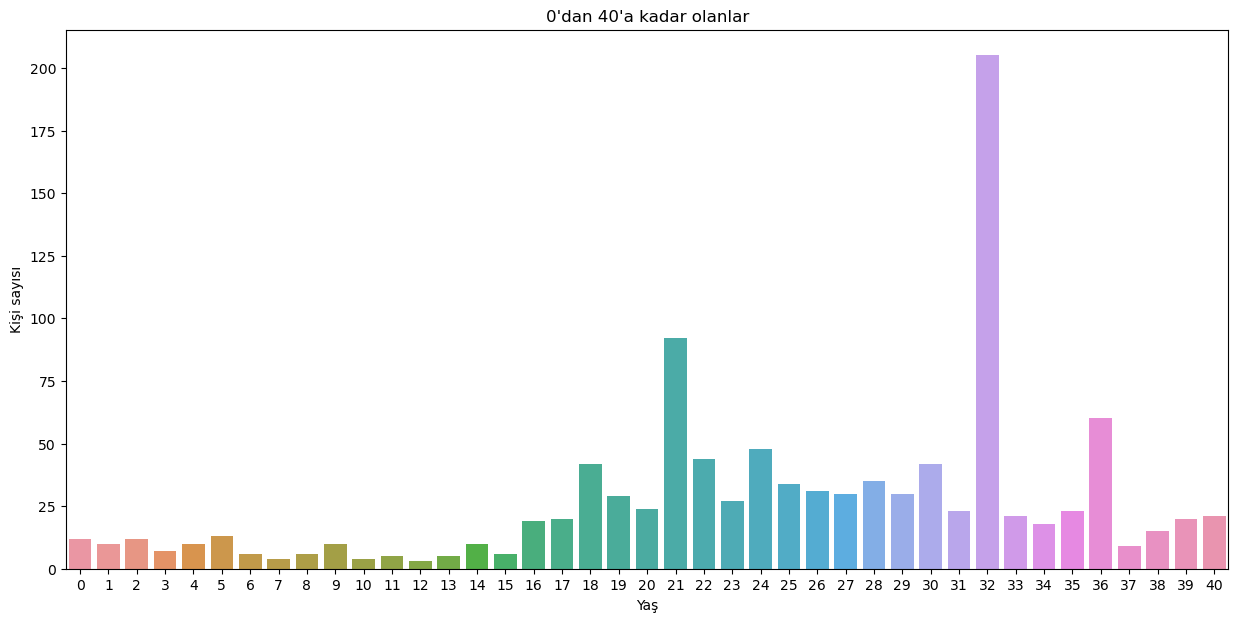

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x=dfa['Agea']);
plt.xlabel('Yaş')
plt.ylabel('Kişi sayısı')
plt.title("0'dan 40'a kadar olanlar");

In [32]:
dfa=df[df['Agea']>=41]

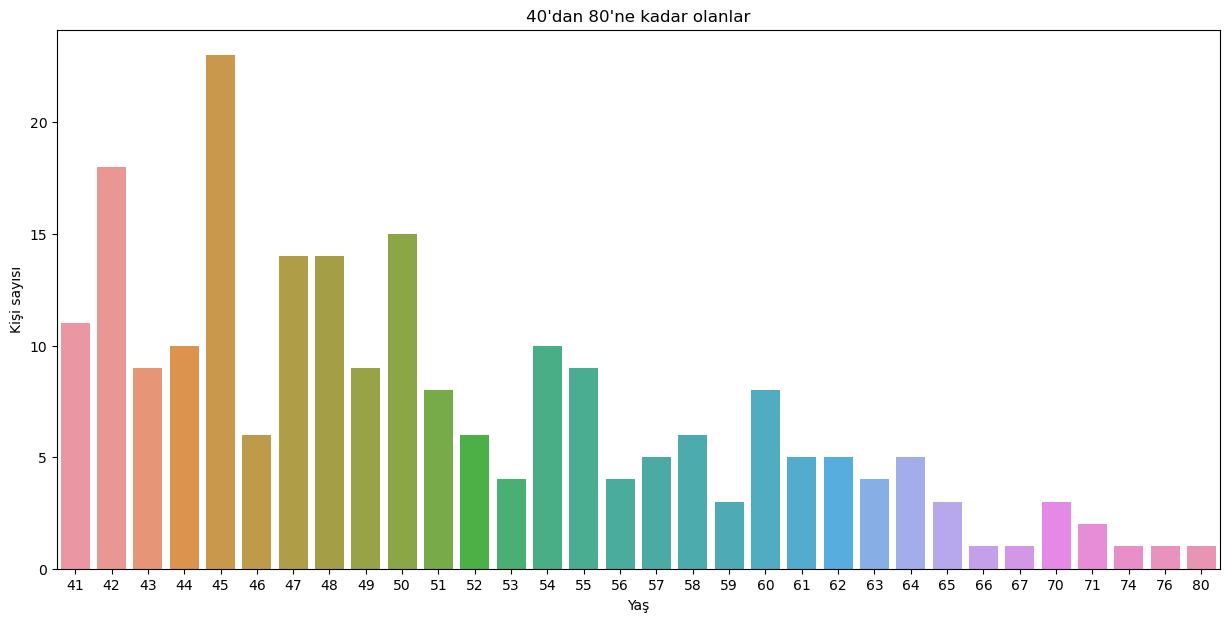

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x=dfa['Agea']);
plt.xlabel('Yaş')
plt.ylabel('Kişi sayısı')
plt.title("40'dan 80'ne kadar olanlar");

### <font color=FF66FF> Burada Fare adındaki sütünda içi boş verileri doldurduk

In [35]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [36]:
df['Fare'].mean()

33.29547928134557

In [37]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [38]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
Agea              0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Agea         1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 148.3+ KB


In [40]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agea
167,168,0.0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,Mrs,45


In [41]:
df=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [42]:
df=pd.get_dummies(df,drop_first=True)

In [43]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Agea,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.000000,1,0,7.2500,22,True,False,True,False
1,1.0,1,38.000000,1,0,71.2833,38,False,False,False,True
2,1.0,3,26.000000,0,0,7.9250,26,False,True,False,False
3,1.0,1,35.000000,1,0,53.1000,35,False,False,False,True
4,0.0,3,35.000000,0,0,8.0500,35,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,32.811056,0,0,8.0500,32,True,False,True,False
414,NaN,1,39.000000,0,0,108.9000,39,False,False,False,True
415,NaN,3,38.500000,0,0,7.2500,38,True,False,True,False
416,NaN,3,32.811056,0,0,8.0500,32,True,False,True,False


In [44]:
train=df[:891]
test=df[891:]

In [45]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Agea,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.000000,1,0,7.2500,22,True,False,True,False
1,1.0,1,38.000000,1,0,71.2833,38,False,False,False,True
2,1.0,3,26.000000,0,0,7.9250,26,False,True,False,False
3,1.0,1,35.000000,1,0,53.1000,35,False,False,False,True
4,0.0,3,35.000000,0,0,8.0500,35,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.000000,0,0,13.0000,27,True,False,True,False
887,1.0,1,19.000000,0,0,30.0000,19,False,True,False,False
888,0.0,3,21.824366,1,2,23.4500,21,False,True,False,False
889,1.0,1,26.000000,0,0,30.0000,26,True,False,True,False


In [46]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Agea,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.500000,0,0,7.8292,34,True,False,True,False
1,NaN,3,47.000000,1,0,7.0000,47,False,False,False,True
2,NaN,2,62.000000,0,0,9.6875,62,True,False,True,False
3,NaN,3,27.000000,0,0,8.6625,27,True,False,True,False
4,NaN,3,22.000000,1,1,12.2875,22,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,32.811056,0,0,8.0500,32,True,False,True,False
414,NaN,1,39.000000,0,0,108.9000,39,False,False,False,True
415,NaN,3,38.500000,0,0,7.2500,38,True,False,True,False
416,NaN,3,32.811056,0,0,8.0500,32,True,False,True,False


In [47]:
df.isnull().sum()

Survived      418
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Agea            0
Sex_male        0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
dtype: int64

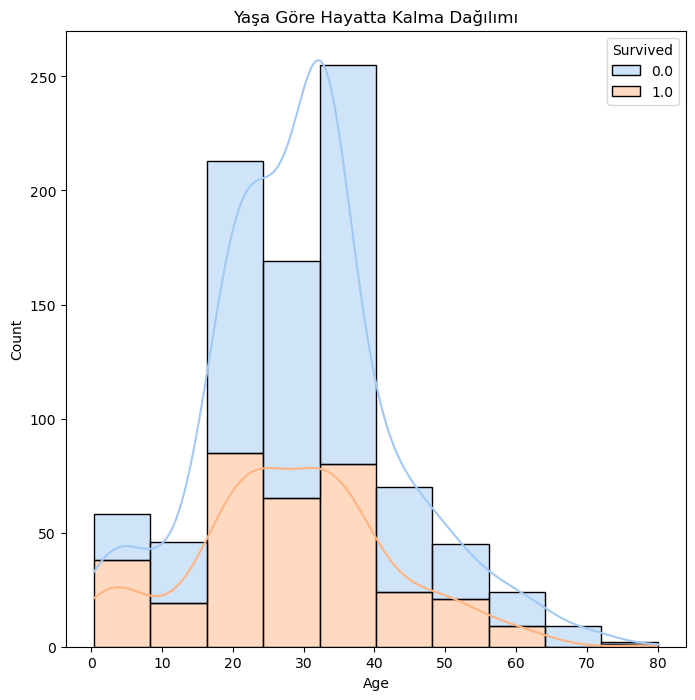

In [48]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='Age',hue='Survived',
            multiple='stack',kde=True,palette='pastel',bins=10,alpha=.5)
plt.title('Yaşa Göre Hayatta Kalma Dağılımı');

In [49]:
x=train.drop('Survived',axis=1)
y=train[['Survived']]

In [50]:
g=GaussianNB()
b=BernoulliNB()
r=RandomForestClassifier()
gr=GradientBoostingClassifier()
kn=KNeighborsClassifier()

In [51]:
test1=test.drop('Survived',axis=1)

#### <font color=red> Burada GaussianNB hesaplayıp bilgisayara dosya olarak kaydettik

In [53]:
g.fit(x,y)
tahmin1=g.predict(test1)
sonuc1=pd.DataFrame()
sonuc1['PassengerId']=df2['PassengerId']
sonuc1['Survived']=tahmin1
sonuc1['Survived']=sonuc1['Survived'].astype('int32')

In [54]:
sonuc1.to_csv('Titanic_GaussianNB.csv',index=False)

#### <font color=blue> Burada BernoulliNB hesaplayıp bilgisayara dosya olarak kaydettik

In [56]:
b.fit(x,y)
tahmin2=b.predict(test1)
sonuc2=pd.DataFrame()
sonuc2['PassengerId']=df2['PassengerId']
sonuc2['Survived']=tahmin2
sonuc2['Survived']=sonuc2['Survived'].astype('int32')

In [57]:
sonuc2.to_csv('Titanic_BernoulliNB.csv',index=False)

#### <font color=pink> Burada RandomForestClassifier hesaplayıp bilgisayara dosya olarak kaydettik

In [59]:
r.fit(x,y)
tahmin3=r.predict(test1)
sonuc3=pd.DataFrame()
sonuc3['PassengerId']=df2['PassengerId']
sonuc3['Survived']=tahmin3
sonuc3['Survived']=sonuc3['Survived'].astype('int32')

In [60]:
sonuc3.to_csv('Titanic_RandomForestClassifier.csv',index=False)

#### <font color=orange> Burada GradientBoostingClassifier hesaplayıp bilgisayara dosya olarak kaydettik

In [62]:
gr.fit(x,y)
tahmin4=gr.predict(test1)
sonuc4=pd.DataFrame()
sonuc4['PassengerId']=df2['PassengerId']
sonuc4['Survived']=tahmin4
sonuc4['Survived']=sonuc4['Survived'].astype('int32')

In [63]:
sonuc4.to_csv('Titanic_GradientBoostingClassifier.csv',index=False)

#### <font color=lime> Burada KNeighborsClassifier hesaplayıp bilgisayara dosya olarak kaydettik

In [65]:
kn.fit(x,y)
tahmin5=kn.predict(test1)
sonuc5=pd.DataFrame()
sonuc5['PassengerId']=df2['PassengerId']
sonuc5['Survived']=tahmin5
sonuc5['Survived']=sonuc5['Survived'].astype('int32')

In [66]:
sonuc5.to_csv('Titanic_KNeighborsClassifier.csv',index=False)